<a href="https://colab.research.google.com/github/WeiningKan/Applied-Spatial-Statistics-Course-Project-Code/blob/main/A1_WeiningKan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GIS5122 Assignment 1
Due date/time: Feb 9 Friday 23:59pm

**Instruction**: Make a copy of this notebook and read through the questions and descriptions. Write down code/text to perform the analysis.

**Submission**: After you finish working on this notebook, click File->Download->Download .ipynb

Please submit this notebook renamed as A1_your_name.ipynb on Canvas.

## Detailed instructions:
In this assignment, you will practice concepts we learned in the statistical inference classes. You will be given two real life datasets:

1. A county level health data obtained from [CDC](https://www.cdc.gov/places/index.html). This data has all the counties in the US (~3,100). You can find the explanations to the columns in the data [here](https://raw.githubusercontent.com/Ziqi-Li/GIS5122/main/data/cdc_county_health.txt).
2. A county level median household income data obtained from the American Community Survey. This data is only for Florida.

Below are specific tasks you need to perform and their credits (total 100%):
1. Merge the two datasets into a single DataFrame containing both health data and income data for Florida only. The common ID that can be used for merging is `LocationID` in the health data and `Geo_ID` in the income data. This step is given by using the `pandas.merge()` function.
2. Choose one health outcome variable and calculate the Pearson's correlation coefficient between that health variable and the income variable. Report the coefficient and its p-value. (20%)
3. Use the bootstrap method to calculate a 95% confidence interval for the correlation coefficient. Provide a clear interpretation of this confidence interval. (40%)
4. Perform a permutation test on the correlation coefficient and report its simulated p-value from this permutation test. Compare the result with the p-value obtained in step 2 and provide a clear interpretation of this p-value. (40%)


For both bootstrap and permutation test, you can go with 1,000 iterations. Also, please use all the data (instead of a small portion) to generate either bootstrap sample or permutated sample.


Below is the code that can help you get started:

In [ ]:
import pandas as pd

In [ ]:
health_url = "https://raw.githubusercontent.com/Ziqi-Li/GIS5122/main/data/cdc_health_county.csv"
health = pd.read_csv(health_url)

In [ ]:
income_url = "https://raw.githubusercontent.com/Ziqi-Li/GIS5122/main/data/Florida_counties_median_income_2021.csv"
income = pd.read_csv(income_url)

In [ ]:
income_health = pd.merge(income, health, left_on = "Geo_ID", right_on = "LocationID")

In [ ]:
income_health.head()

,Unnamed: 0,Geo_ID,Name,Median_income,LocationID,ACCESS2,ARTHRITIS,BINGE,CANCER,CASTHMA,...,DIABETES,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PHLTH,SLEEP,STROKE,TEETHLOST
0,0,12001,"Alachua County, Florida",53314,12001,19.3,23.3,18.8,6.3,9.0,...,11.1,2.9,24.6,72.6,14.8,30.7,12.7,36.0,3.3,15.9
1,1,12003,"Baker County, Florida",63860,12003,22.7,26.1,17.4,6.4,9.3,...,10.8,2.9,27.9,68.7,16.9,32.8,14.8,43.2,3.6,19.6
2,2,12005,"Bay County, Florida",60473,12005,19.7,27.7,17.4,6.5,9.2,...,10.5,2.8,27.8,69.5,16.8,31.6,14.4,39.8,3.3,15.7
3,3,12007,"Bradford County, Florida",48803,12007,26.2,27.0,17.4,6.3,9.6,...,12.3,3.2,34.3,69.8,17.8,35.9,16.8,41.4,4.1,23.0
4,4,12009,"Brevard County, Florida",63632,12009,19.7,25.1,18.8,6.4,8.9,...,10.0,2.7,25.0,74.3,15.4,32.6,13.1,40.7,3.1,15.4


## 2.Choose one health outcome variable and calculate the Pearson's correlation coefficient between that health variable and the income variable. Report the coefficient and its p-value.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
income_health = income_health.dropna()

Text(0, 0.5, 'OBESITY')

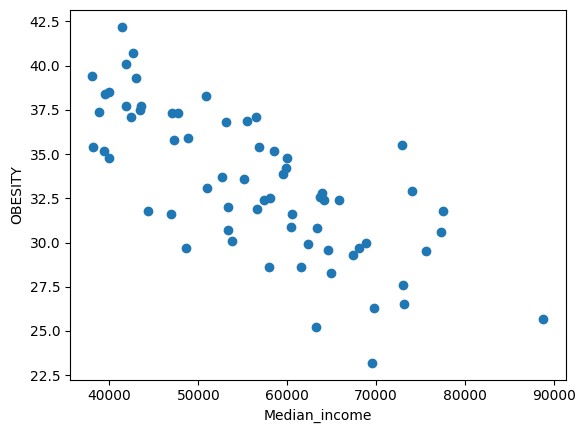

In [ ]:
from scipy.stats import *
plt.scatter(income_health.Median_income, income_health.OBESITY)
plt.xlabel("Median_income")
plt.ylabel("OBESITY")

In [ ]:
print("Pearson:",pearsonr(income_health.Median_income, income_health.OBESITY))

Pearson: PearsonRResult(statistic=-0.7343032287316698, pvalue=2.281301199241349e-12)


## 3.Use the bootstrap method to calculate a 95% confidence interval for the correlation coefficient. Provide a clear interpretation of this confidence interval.

In [ ]:
#Define a bootstrap function:
np.random.seed(333)
def bootstrap_pearson(income_health):

    bootstrap_cor_list = []

    for i in range(1000):
        subsample = income_health.sample(len(income_health), replace=True)

        sample_cor = pearsonr(subsample.OBESITY, subsample.Median_income)[0]

        bootstrap_cor_list.append(sample_cor)

    #Get the lower and upper bound for the middle 95%:
    percentile_CI = [np.percentile(bootstrap_cor_list, 2.5),
          np.percentile(bootstrap_cor_list, 97.5)]

    return percentile_CI


In [ ]:
bootstrap_pearson(income_health)

[-0.826310414988632, -0.6225457233616892]

In [ ]:
print("95% confidence interval of the Pearson correlation coefficient is:",
     "[-0.826 to -0.622]")

95% confidence interval of the Pearson correlation coefficient is: [-0.826 to -0.622]


The 95% confidence interval for the Pearson correlation coefficient, estimated to be [-0.826, -0.622], provides a range in which we can be 95% confident that the true correlation coefficient between obesity rate among adults aged >=18 years and median household income for counties in Florida lies.

## 4.Permutation test

In [ ]:
def permutation_cor(income_health):

    null_cor_list = []

    for i in range(10000):
        subsample_Y = np.random.permutation(income_health.Median_income)

        sample_cor = pearsonr(income_health.OBESITY, subsample_Y)[0]

        null_cor_list.append(sample_cor)

    return null_cor_list

In [ ]:
null_dist = permutation_cor(income_health)

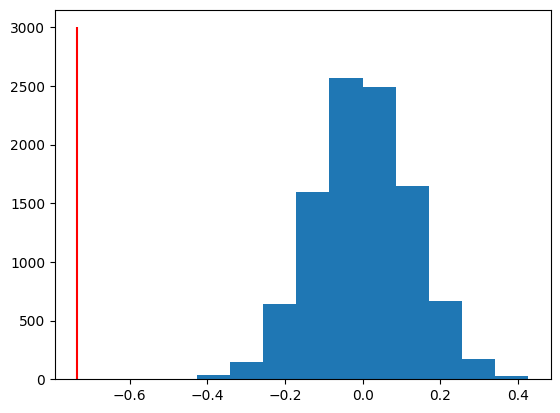

In [ ]:
plt.hist(null_dist)

plt.vlines(pearson_rslt[0],ymin=0,ymax=3000,color="red")

In [ ]:
np.sum(np.abs(np.array(null_dist)) >= np.abs(pearson_rslt[0]))

0

In [ ]:
import numpy as np
p_sim = np.sum(np.abs(np.array(null_dist)) >= np.abs(pearson_rslt[0]))/1000

In [ ]:
print("The simulated p-value (2-tail): ", p_sim)

print("The actual p-value (2-tail) : ", pearson_rslt[1])

The simulated p-value (2-tail):  0.0
The actual p-value (2-tail) :  2.281301199241349e-12


A simulated p-value of 0.0 suggests that the observed negative correlation between obesity rate and median household income is highly unlikely to have occurred by chance. This reinforces the statistical significance of the relationship. The permutation test p-value is consistent with the p-value obtained in step 2 (approximately 2.28e-12), which was also very low. Both results indicate a significant correlation.